In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
os.getcwd()
os.chdir( "C:/Users/Miray/Desktop")
os.getcwd()

'C:\\Users\\Miray\\Desktop'

In [39]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import statsmodels.api as sm 
import statsmodels.formula.api as smf 
from sklearn.preprocessing import scale, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score, roc_curve, mean_squared_error
from sklearn import tree 
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from warnings import filterwarnings
filterwarnings('ignore')

ModuleNotFoundError: No module named 'xgboost'

In [40]:
finans=pd.read_csv("finans.csv")

In [41]:
hq=finans.copy()
df=hq.dropna()
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2018 entries, 153 to 3549
Data columns (total 13 columns):
bad        2018 non-null int64
loan       2018 non-null int64
mortdue    2018 non-null float64
value      2018 non-null float64
reason     2018 non-null object
job        2018 non-null object
yoj        2018 non-null float64
derog      2018 non-null float64
delinq     2018 non-null float64
clage      2018 non-null float64
ninq       2018 non-null float64
clno       2018 non-null float64
debtinc    2018 non-null float64
dtypes: float64(9), int64(2), object(2)
memory usage: 220.7+ KB


,bad,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc
153,0,18200,94727.0,136877.0,DebtCon,Mgr,15.0,0.0,0.0,168.96,2.0,26.0,36.056
154,0,21700,79240.0,96784.0,DebtCon,Mgr,5.0,0.0,0.0,64.51,6.0,24.0,38.079
155,0,34100,241931.0,36486.0,DebtCon,Mgr,1.0,0.0,2.0,196.01,3.0,50.0,42.459
156,0,8400,62989.0,76718.0,HomeImp,Mgr,3.0,0.0,2.0,131.47,0.0,22.0,29.200
157,0,17400,25859.0,43684.0,DebtCon,Mgr,16.0,1.0,0.0,95.36,1.0,17.0,27.108


In [42]:
dms=pd.get_dummies(df[['reason','job']])
dms.head()

,reason_DebtCon,reason_HomeImp,job_Mgr,job_Office,job_Other,job_ProfEx,job_Sales,job_Self
153,1,0,1,0,0,0,0,0
154,1,0,1,0,0,0,0,0
155,1,0,1,0,0,0,0,0
156,0,1,1,0,0,0,0,0
157,1,0,1,0,0,0,0,0


In [43]:
y=df["bad"]
X_=df.drop(["bad","reason","job"],axis=1).astype("float64")
# X'in alacağı değerlerden kategorikleri ve hedef değişkeni sildik.
X_.head()

,loan,mortdue,value,yoj,derog,delinq,clage,ninq,clno,debtinc
153,18200.0,94727.0,136877.0,15.0,0.0,0.0,168.96,2.0,26.0,36.056
154,21700.0,79240.0,96784.0,5.0,0.0,0.0,64.51,6.0,24.0,38.079
155,34100.0,241931.0,36486.0,1.0,0.0,2.0,196.01,3.0,50.0,42.459
156,8400.0,62989.0,76718.0,3.0,0.0,2.0,131.47,0.0,22.0,29.200
157,17400.0,25859.0,43684.0,16.0,1.0,0.0,95.36,1.0,17.0,27.108


In [44]:
X=pd.concat([X_,dms[["reason_HomeImp","job_Mgr","job_Office","job_Other","job_ProfEx","job_Sales","job_Self"]]],axis=1) #dummy haliyle concat yaparak bağımsız değişken dataframe'i oluşturduk.
X.head()

,loan,mortdue,value,yoj,derog,delinq,clage,ninq,clno,debtinc,reason_HomeImp,job_Mgr,job_Office,job_Other,job_ProfEx,job_Sales,job_Self
153,18200.0,94727.0,136877.0,15.0,0.0,0.0,168.96,2.0,26.0,36.056,0,1,0,0,0,0,0
154,21700.0,79240.0,96784.0,5.0,0.0,0.0,64.51,6.0,24.0,38.079,0,1,0,0,0,0,0
155,34100.0,241931.0,36486.0,1.0,0.0,2.0,196.01,3.0,50.0,42.459,0,1,0,0,0,0,0
156,8400.0,62989.0,76718.0,3.0,0.0,2.0,131.47,0.0,22.0,29.200,1,1,0,0,0,0,0
157,17400.0,25859.0,43684.0,16.0,1.0,0.0,95.36,1.0,17.0,27.108,0,1,0,0,0,0,0


In [45]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1513, 17), (505, 17), (1513,), (505,))

In [46]:
df["bad"].value_counts()

0    1840
1     178
Name: bad, dtype: int64

In [47]:
from sklearn.linear_model import LogisticRegression
loj=LogisticRegression(solver="liblinear")
loj_model=loj.fit(X_train,y_train)
loj_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [48]:
y_pred_train=loj_model.predict(X_train)

In [49]:
confusion_matrix(y_train,y_pred_train) 

array([[1370,    4],
       [ 139,    0]], dtype=int64)

In [50]:
y_pred_test=loj_model.predict(X_test)

In [51]:
y_pred_test=loj_model.predict(X_test)
confusion_matrix(y_test,y_pred_test)

array([[465,   1],
       [ 39,   0]], dtype=int64)

In [52]:
print("Train veri seti için :", classification_report(y_train,y_pred_train))

Train veri seti için :               precision    recall  f1-score   support

           0       0.91      1.00      0.95      1374
           1       0.00      0.00      0.00       139

    accuracy                           0.91      1513
   macro avg       0.45      0.50      0.48      1513
weighted avg       0.82      0.91      0.86      1513



In [53]:
print("Test veri seti için :", classification_report(y_test,y_pred_test))

Test veri seti için :               precision    recall  f1-score   support

           0       0.92      1.00      0.96       466
           1       0.00      0.00      0.00        39

    accuracy                           0.92       505
   macro avg       0.46      0.50      0.48       505
weighted avg       0.85      0.92      0.88       505



In [54]:
cross_val_score(loj_model,X_test,y_test, cv=10).mean()

0.922781112444978

In [55]:
#Roc ve diğerlerini ekle.

In [56]:
from sklearn.tree import DecisionTreeClassifier

# CART Algorithm

In [84]:
cart=DecisionTreeClassifier()
cart_model=cart.fit(X_train,y_train)

In [85]:
y_pred_train2=cart_model.predict(X_train)

In [86]:
print("Train seti accuarcy:", accuracy_score(y_train,y_pred_train2))

Train seti accuarcy: 1.0


In [87]:
print("Train seti accuarcy:", accuracy_score(y_train,y_pred_train2))
print(classification_report(y_train,y_pred_train2))

Train seti accuarcy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1374
           1       1.00      1.00      1.00       139

    accuracy                           1.00      1513
   macro avg       1.00      1.00      1.00      1513
weighted avg       1.00      1.00      1.00      1513



In [88]:
y_pred_test2=cart_model.predict(X_test)
print("Test seti accuarcy:", accuracy_score(y_test,y_pred_test2))
print( classification_report(y_test,y_pred_test2))

Test seti accuarcy: 0.9346534653465347
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       466
           1       0.61      0.44      0.51        39

    accuracy                           0.93       505
   macro avg       0.78      0.71      0.74       505
weighted avg       0.93      0.93      0.93       505



In [90]:
cart_grid={"max_depth": range(1,15),
          "min_samples_split" : list(range(15,50))}

In [91]:
cart=tree.DecisionTreeClassifier()
cart_cv=GridSearchCV(cart, cart_grid, cv=10, n_jobs= -1, verbose=2)
cart_cv_model= cart_cv.fit(X_train, y_train)

Fitting 10 folds for each of 490 candidates, totalling 4900 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 4728 tasks      | elapsed:   24.4s
[Parallel(n_jobs=-1)]: Done 4900 out of 4900 | elapsed:   25.5s finished


In [92]:
print("En iyi parametreler:" +str(cart_cv_model.best_params_))

En iyi parametreler:{'max_depth': 2, 'min_samples_split': 37}


In [93]:
cart=tree.DecisionTreeClassifier(max_depth=2, min_samples_split=37)
cart_tuned= cart.fit(X_train,y_train)

In [94]:
y_pred2=cart_tuned.predict(X_test)
print("Tuning sonrası test accuracy score", accuracy_score(y_test,y_pred2)) 
print( classification_report(y_test,y_pred2))#tuning ile yükseldi.

Tuning sonrası test accuracy score 0.9425742574257425
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       466
           1       0.78      0.36      0.49        39

    accuracy                           0.94       505
   macro avg       0.86      0.68      0.73       505
weighted avg       0.94      0.94      0.93       505



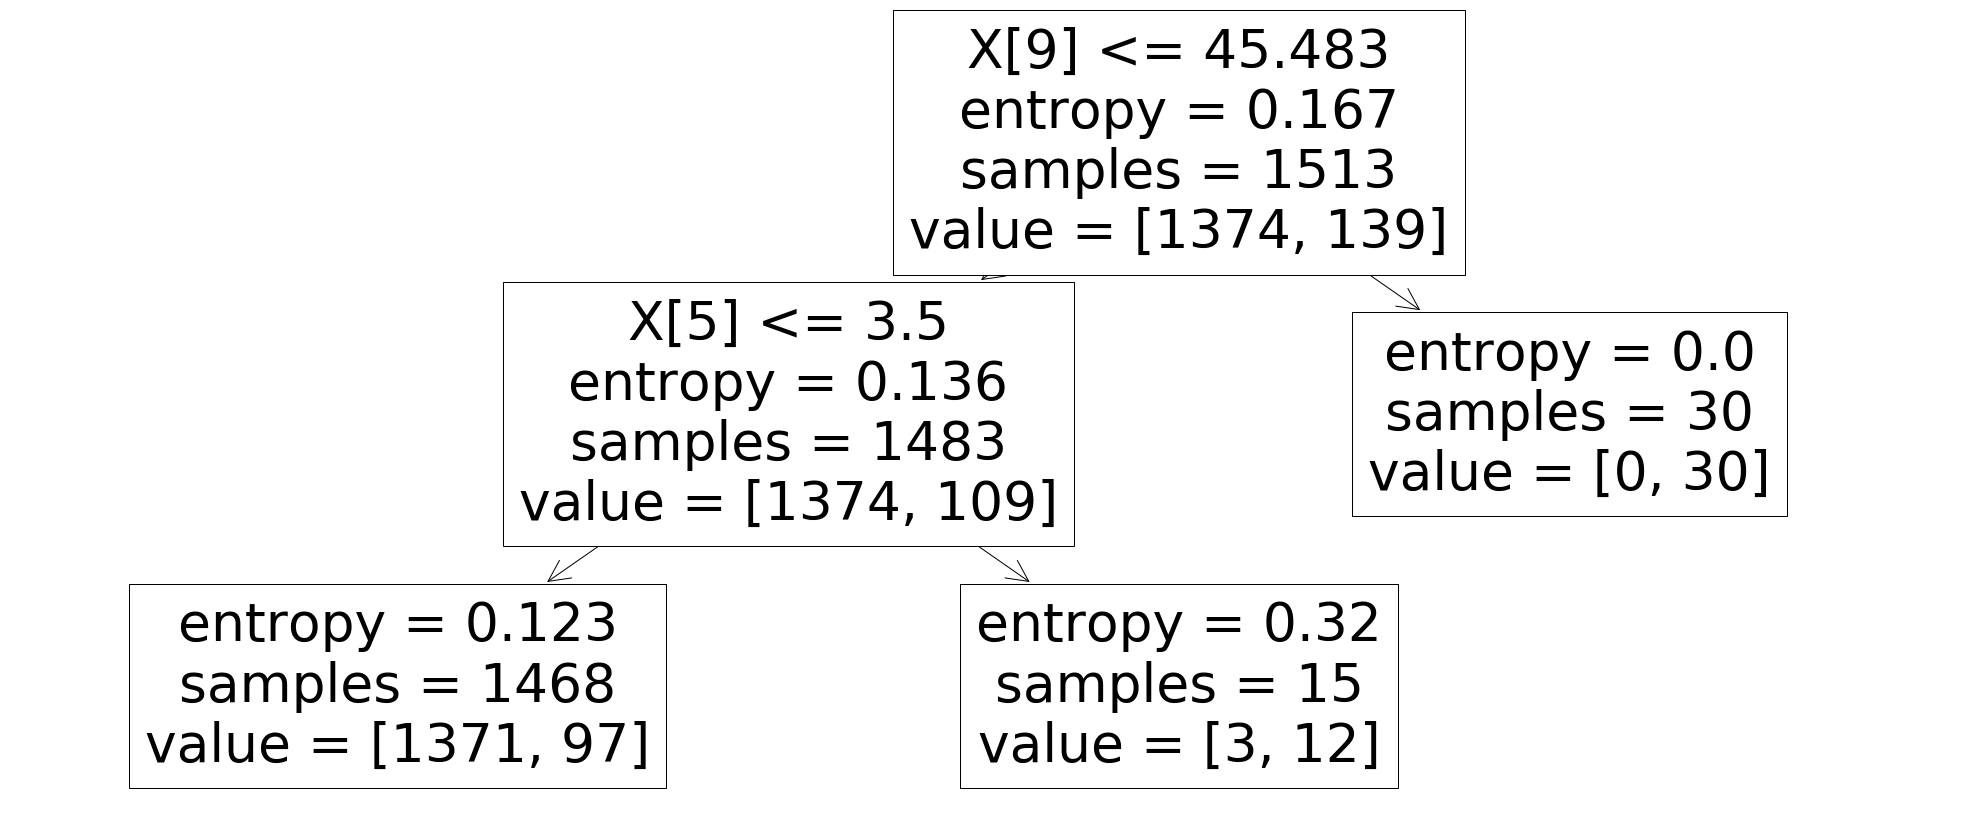

In [95]:
plt.figure(figsize=(35,15))
tree.plot_tree(cart_tuned);

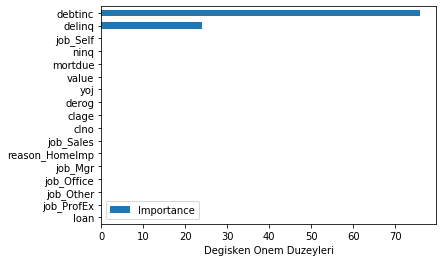

In [96]:
Importance = pd.DataFrame({"Importance": cart_tuned.feature_importances_*100},
                          index = X_train.columns)

Importance.sort_values(by="Importance", axis=0, ascending=True).plot(kind="barh")
plt.xlabel("Degisken Onem Duzeyleri")
plt.show()

# Random Forest Algorithm

In [66]:
rf=RandomForestClassifier(random_state=42)
rf_model=rf.fit(X_train,y_train)

C:\Users\Miray\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [74]:
y_pred3=rf_model.predict(X_test)
print("Test Seti Random Forest Accuracy Score:", accuracy_score(y_test,y_pred3))
print(classification_report(y_test,y_pred3),"Test veri seti için :")

Test Seti Random Forest Accuracy Score: 0.9524752475247524
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       466
           1       0.94      0.41      0.57        39

    accuracy                           0.95       505
   macro avg       0.95      0.70      0.77       505
weighted avg       0.95      0.95      0.94       505
 Test veri seti için :


In [36]:
rf_params={"max_depth": list(range(2,10)),
        "max_features": [2,5,17],
        "n_estimators": [10,20,50]}
rf_model = RandomForestRegressor(random_state=42)

rf_cv_model = GridSearchCV(rf_model, 
                           rf_params, 
                           cv=10, 
                           n_jobs=-1, 
                           verbose=2)
rf_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 72 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   15.7s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   22.0s
[Parallel(n_jobs=-1)]: Done 602 tasks      | elapsed:   44.2s
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:   55.3s finished
C:\Users\Miray\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8,

In [69]:
print("Random Forest en iyi parametre değerleri:",rf_cv_model.best_params_)

Random Forest en iyi parametre değerleri: {'max_depth': 9, 'max_features': 5, 'n_estimators': 50}


In [70]:
rf_tuned=RandomForestClassifier(max_depth=9, max_features=5, n_estimators=50)
rf_tuned.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=9, max_features=5, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [97]:
y_pred_tuned=rf_tuned.predict(X_test)
print("Random Forest Tuning Sonrası Accuracy Değeri:", accuracy_score(y_test,y_pred_tuned))
print( classification_report(y_test,y_pred_tuned),"Test_tuned veri seti için")

Random Forest Tuning Sonrası Accuracy Değeri: 0.9544554455445544
              precision    recall  f1-score   support

           0       0.95      1.00      0.98       466
           1       1.00      0.41      0.58        39

    accuracy                           0.95       505
   macro avg       0.98      0.71      0.78       505
weighted avg       0.96      0.95      0.95       505
 Test_tuned veri seti için


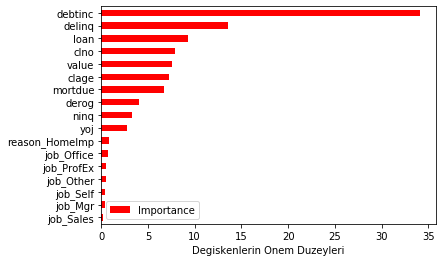

In [53]:
importance = pd.DataFrame({"Importance": rf_tuned.feature_importances_*100},
                          index=X_train.columns)
importance.sort_values(by="Importance", axis=0, ascending=True).plot(kind="barh", color="r")
plt.xlabel("Degiskenlerin Onem Duzeyleri")
plt.show()

In [ ]:
plt.figure(figsize=(30,15))
tree.plot_tree(rf_tuned);

# Yapay Sinir Ağı

In [54]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

scaler.fit(X_test)
X_test_scaled = scaler.transform(X_test)

In [55]:
from sklearn.neural_network import MLPClassifier
mlp_model = MLPClassifier(hidden_layer_sizes=(100,20)).fit(X_train_scaled, y_train)
mlp_model

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100, 20), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [58]:
y_pred_m=mlp_model.predict(X_test_scaled)
print("Yapay Sinir Ağı Accuracy Değeri:", accuracy_score(y_test,y_pred_m))

Yapay Sinir Ağı Accuracy Değeri: 0.9405940594059405


In [59]:
mlp_param = {"alpha": [0.1,0.01,0.02,0.005],
             "hidden_layer_sizes": [(10,10,10),
                                    (20,20), 
                                    (100,50,150), 
                                    (300,200,150),
                                    (3,5),
                                    (5,3)],
             "activation": ["relu","logistic"],
             "solver": ["lbfgs", "adam","sgd"]}


mlp_cv_model = GridSearchCV(mlp_model, mlp_param, cv=10, n_jobs=-1, verbose=2)
mlp_cv_model.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 144 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   20.4s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  7.5min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed: 12.3min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed: 18.3min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed: 23.8min finished


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08,
                                     hidden_layer_sizes=(100, 20),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_iter=200,
                                     momentum=0.9, n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_...
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'activation': ['relu', '

In [61]:
y_mlp_tuned=mlp_cv_model.predict(X_test_scaled)
print("Tuning Sonrası YSA Accuracy Değeri:", accuracy_score(y_test,y_mlp_tuned))

Tuning Sonrası YSA Accuracy Değeri: 0.9544554455445544
